In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
#plt.style.use('dark_background')
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Notebooks/module 5 linear Regression/2. linear regression/Transformed_Housing_Data2.csv')

In [3]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price':sale_price,'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

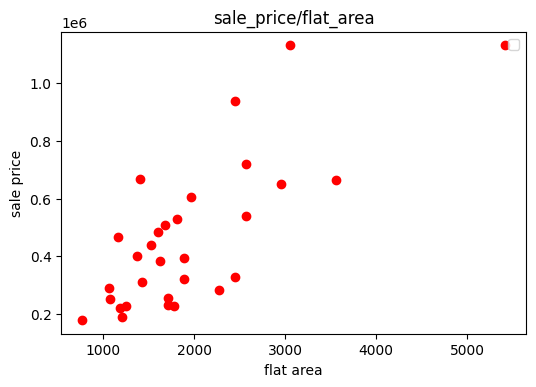

In [18]:
plt.figure(dpi=100)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color = 'red')
plt.xlabel('flat area')
plt.ylabel('sale price')
plt.title('sale_price/flat_area')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

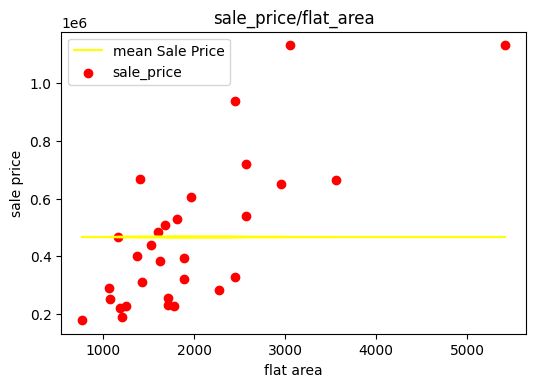

In [20]:
sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi=100)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color = 'red' , label = 'sale_price')
plt.plot(sample_data.flat_area,sample_data.mean_sale_price,color= 'yellow' , label = 'mean Sale Price')
plt.xlabel('flat area')
plt.ylabel('sale price')
plt.title('sale_price/flat_area')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

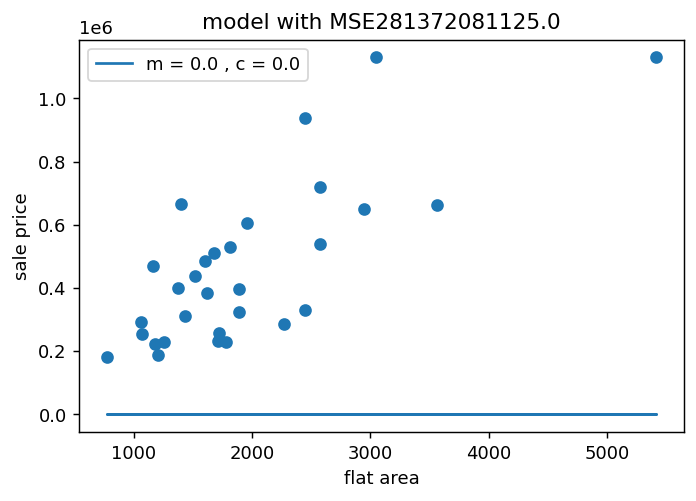

In [27]:
c = 0
m = 0 # initially for the line

line = [] # list tp store all the value 

for i in range(len(sample_data.sale_price)): # prediction based on data
  line.append(sample_data.flat_area[i]*m + c)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area,sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0 , c = 0.0')
plt.xlabel('flat area')
plt.ylabel('sale price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('model with MSE ' + str(MSE))
plt.show

<function matplotlib.pyplot.show>

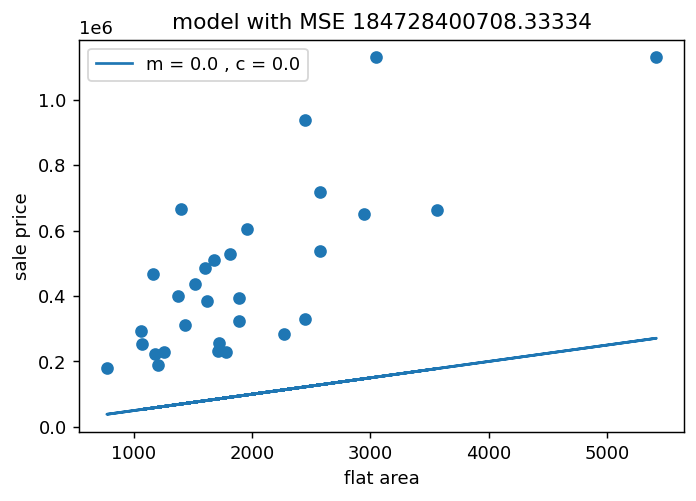

In [28]:
c = 0
m = 50 # initially for the line

line = [] # list tp store all the value 

for i in range(len(sample_data.sale_price)): # prediction based on data
  line.append(sample_data.flat_area[i]*m + c)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area,sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0 , c = 0.0')
plt.xlabel('flat area')
plt.ylabel('sale price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('model with MSE ' + str(MSE))
plt.show

In [38]:
def slope_Error( slope, intercept ,  sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [39]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
  cost = slope_Error(i,0,sample_data)
  Cost.append(cost)

In [40]:
Cost_table = pd.DataFrame({'slope':slope,'cost':Cost})
Cost_table.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


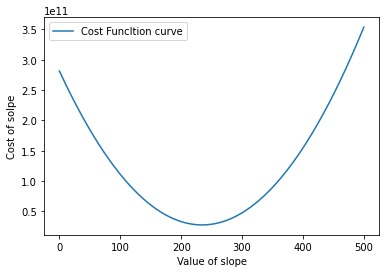

In [42]:
# cost value cprresponding to every value of m
plt.plot(Cost_table['slope'],Cost_table['cost'],label='Cost Funcltion curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost of solpe')
plt.legend()

In [46]:
new_slope = Cost_table['slope'][Cost_table['cost'] == Cost_table['cost'].min()].values
new_slope[0]

234.3

In [54]:
def intercept_Error( slope, intercept ,  sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]*slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [68]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
  cost = intercept_Error(new_slope[0],i,sample_data)
  Cost.append(cost)

In [69]:
Cost_table = pd.DataFrame({'intercept':intercept,'cost':Cost})
Cost_table.head()

,intercept,cost
0,5000,2.780450e+10
1,5001,2.780449e+10
2,5002,2.780448e+10
3,5003,2.780447e+10
4,5004,2.780446e+10


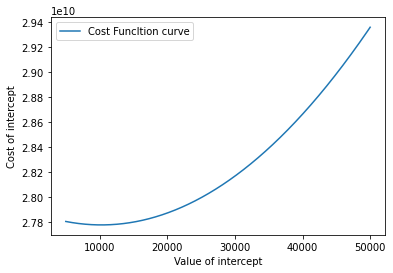

In [70]:
# cost value cprresponding to every value of c
plt.plot(Cost_table['intercept'],Cost_table['cost'],label='Cost Funcltion curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost of intercept')
plt.legend()

In [71]:
new_intercept = Cost_table['intercept'][Cost_table['cost'] == Cost_table['cost'].min()].values
new_intercept[0]

10251

In [73]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
  cost = slope_Error(i,new_intercept[0],sample_data)
  Cost.append(cost)

Cost_table = pd.DataFrame({'slope':slope,'cost':Cost})
Cost_table.tail()

new_slope = Cost_table['slope'][Cost_table['cost'] == Cost_table['cost'].min()].values
new_slope[0]

230.0

We need to repeate few tmes till both the value are steady m = 219 and c = 39428